In [16]:
from main import *
import matplotlib.pyplot as plt 

In [24]:
# Data Management 
# processing path must include sentinel bands information vs mask data
processing_path = r"./data"
date_tag = get_date_tag()


scl_filename = 'imageExample_SCL.tif'
bands_filename = 'imageExample_Bands.tif'
file_scl = os.path.join(processing_path, scl_filename)
file_bands = os.path.join(processing_path, bands_filename)




In [29]:
#read and display mask data
scl_data = read_raster_data_xr(file_scl)
scl_data


<xarray.DataArray (band: 1, y: 2057, x: 2177)>
[4478089 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.592e+05 6.592e+05 6.592e+05 ... 6.81e+05 6.81e+05
  * y            (y) float64 5.896e+06 5.896e+06 ... 5.875e+06 5.875e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     SCL

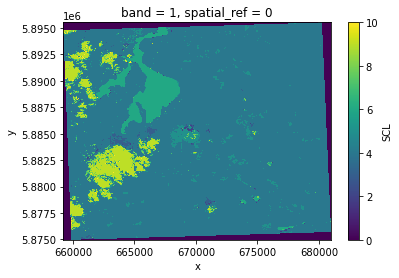

In [30]:
scl_data.plot()

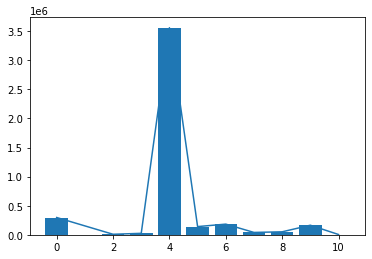

In [43]:
unique, frequency = np.unique(scl_data.values,
                              return_counts = True) 
plt.bar(unique, frequency)
plt.plot(unique, frequency)